## Q1008 Construct Binary Search Tree from Preorder Traversal

Return the root node of a binary search tree that matches the given preorder traversal.

(Recall that a binary search tree is a binary tree where for every node, any descendant of node.left has a value < node.val, and any descendant of node.right has a value > node.val.  Also recall that a preorder traversal displays the value of the node first, then traverses node.left, then traverses node.right.)

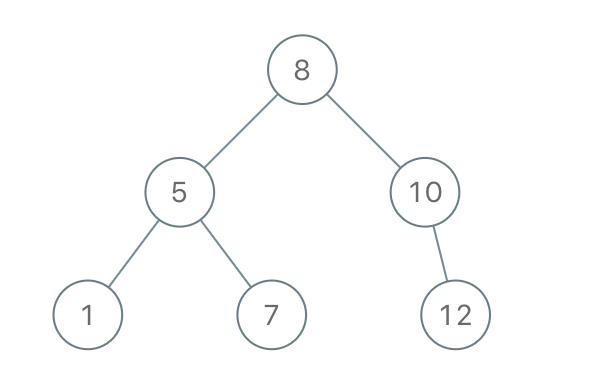

It's guaranteed that for the given test cases there is always possible to find a binary search tree with the given requirements.

Example 1:

```
Input: [8,5,1,7,10,12]
Output: [8,5,10,1,7,null,12]
````

Constraints:

1 <= preorder.length <= 100
1 <= preorder[i] <= 10^8
The values of preorder are distinct.

In [14]:
class TreeNode:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def bstFromPreorder(preorder):
    root = TreeNode(preorder[0])
    stack = []
    stack.append(root)
    
    for i in range(1, len(preorder)):
        node = TreeNode(preorder[i])
        recent = stack[-1]
        
        while stack and stack[-1].val < node.val:
            recent = stack.pop()
            
        if recent.val > preorder[i]:
            recent.left = node
        else:
            recent.right = node
            
        stack.append(node)
        
    return root

def printTreeLevelOrder(root):
    output = []
    
    def helper(head, index):
        if head:            
            if index + 1 > len(output):
                output.append([])
                
            output[index].append(head.val)
            
            helper(head.left, index+1)
            helper(head.right, index+1)
            
    helper(root, 0)
    print(output)

In [15]:
printTreeLevelOrder(bstFromPreorder([8,5,1,7,10,12]))

[[8], [5, 10], [1, 7, 12]]


 ## Optimized version

In [ ]:
def bstFromPreorder(preorder):
    def helper(high=float('inf')):
        if preorder and preorder[0] < high:
            
            val = preorder.pop(0)
            root = TreeNode(val)
            root.left = helper(val)
            root.right = helper(high)
            
            return root
            
    return helper()